#**data preprocessing**



**Importing the Pandas library for data manipulation and analysis**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3



**Reading the breast cancer dataset from a CSV file**


In [4]:
df = pd.read_csv("E:\\breast-cancer.csv")


In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Counting the total number of duplicate rows in the DataFrame**


In [6]:
df.duplicated().sum()

0

**Displaying a summary of the DataFrame including the number of entries, columns, data types, and non-null counts**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df["id"] = df["id"].astype(object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    object 
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Data contain 569 row and 32 column**

In [27]:
df.shape

(569, 32)

**Counting the number of null values in each column of the DataFrame**



In [14]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


**Descriptive statistics for the numerical columns in the DataFrame**



In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


**Unique values of "diagnosis"**



In [16]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

**Count of each diagnosis: 'M' for malignant and 'B' for benign**

In [17]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


**Save cleaned Data**



In [18]:
df.to_csv('Cleaned_Breast Cancer.csv', index=False)

#**EDA**

diagnosis
B    357
M    212
Name: count, dtype: int64


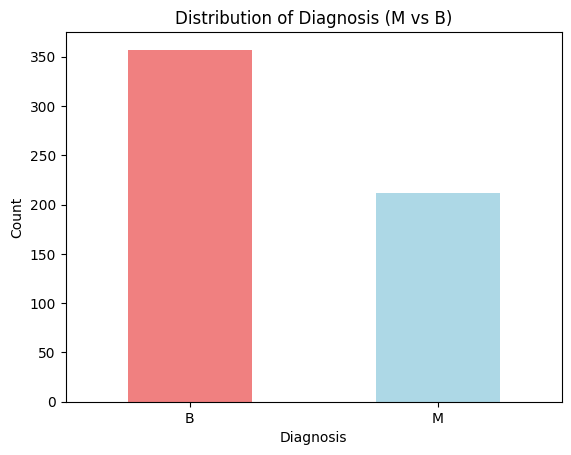

In [19]:
diagnosis_counts = df['diagnosis'].value_counts()

print(diagnosis_counts)

diagnosis_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribution of Diagnosis (M vs B)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**boxplots visualize the relationship between the features 'radius_mean' and 'perimeter_mean' with the diagnosis type **



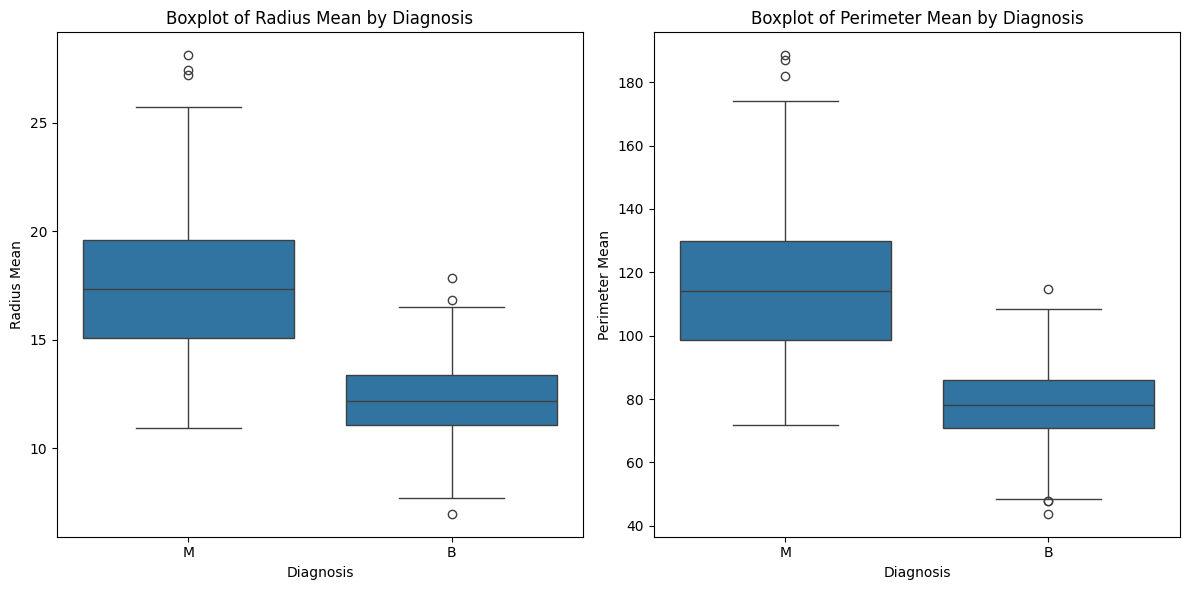

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')

plt.subplot(1, 2, 2)
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df)
plt.title('Boxplot of Perimeter Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Perimeter Mean')

plt.tight_layout()
plt.show()

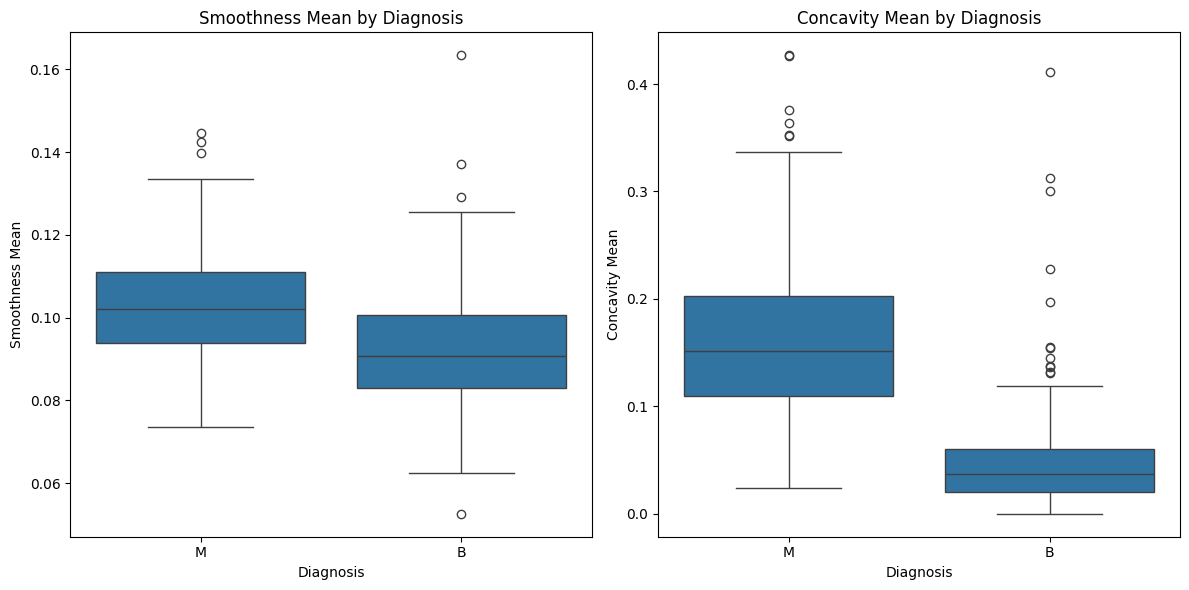

In [21]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='diagnosis', y='smoothness_mean', data=df)
plt.title('Smoothness Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Smoothness Mean')


plt.subplot(1, 2, 2)
sns.boxplot(x='diagnosis', y='concavity_mean', data=df)
plt.title('Concavity Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Concavity Mean')

plt.tight_layout()
plt.show()

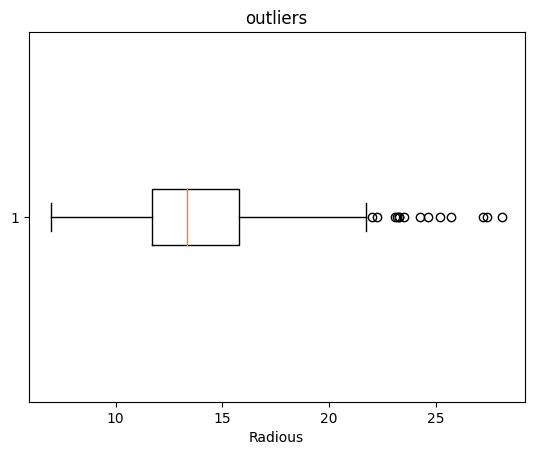

In [22]:

plt.boxplot(df["radius_mean"],vert=False)

# Add x-label axis
plt.xlabel("Radious")

# Add y-label axis
plt.title("outliers");

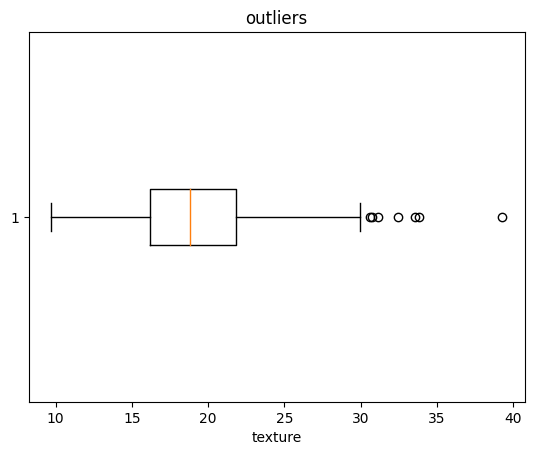

In [23]:

plt.boxplot(df["texture_mean"],vert=False)

# Add x-label axis
plt.xlabel("texture")

# Add y-label axis
plt.title("outliers");

# insights

1.Analyze the proportion of malignant vs. benign tumors.

In [10]:
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

B    357
M    212
Name: diagnosis, dtype: int64


2.Examine correlations between different features to identify which characteristics are most associated with malignancy.

In [12]:
correlation_matrix = df.corr()
print(correlation_matrix)

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

3.Identify outliers in key features that may indicate unusual tumor characteristics.

In [13]:
outliers = df[df['area_mean'] > df['area_mean'].quantile(0.95)]
print(outliers)

            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
1       842517         M        20.57         17.77           132.9   
23      851509         M        21.16         23.04           137.2   
82     8611555         M        25.22         24.91           171.5   
108      86355         M        22.27         19.67           152.8   
122     865423         M        24.25         20.20           166.2   
164    8712289         M        23.27         22.04           152.1   
180     873592         M        27.22         21.87           182.1   
181     873593         M        21.09         26.57           142.7   
202     878796         M        23.29         26.67           158.9   
212    8810703         M        28.11         18.47           188.5   
233   88206102         M        20.51         27.81           134.4   
236   88299702         M        23.21         26.97           153.5   
250     884948         M        20.94         23.56           138.9   
265   

In [14]:
correlation_matrix = df.corr()
print(correlation_matrix)

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

In [15]:
smoothness_means = df.groupby('diagnosis')['smoothness_mean'].mean()
print(smoothness_means)

diagnosis
B    0.092478
M    0.102898
Name: smoothness_mean, dtype: float64


In [12]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,NaN,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,0.074626,NaN,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,NaN,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,NaN,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,NaN,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,NaN,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,NaN,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,NaN,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,NaN,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


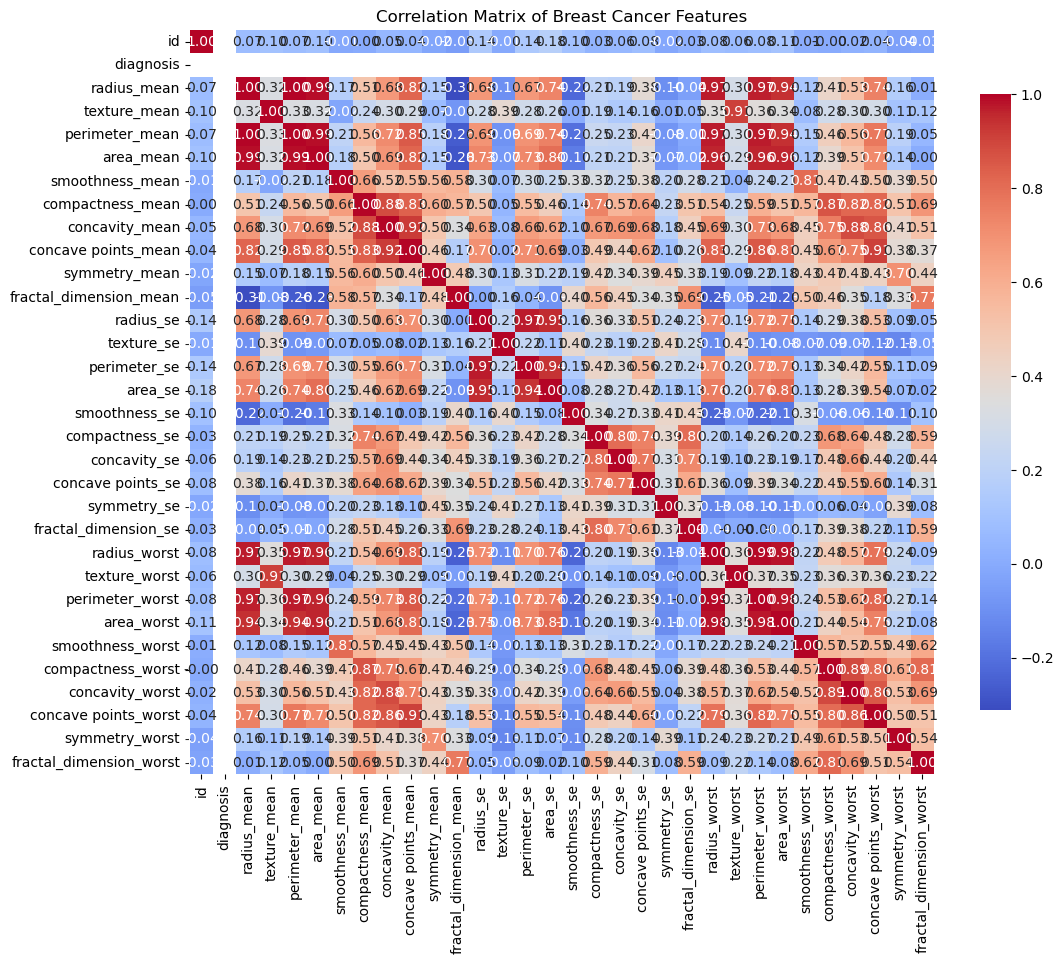

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Matrix of Breast Cancer Features')

# Show the plot
plt.show()